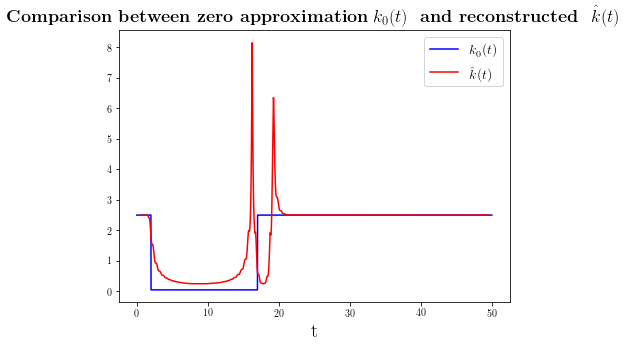

/usr/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:68: RuntimeWarning: invalid value encountered in less
  results &= comparator(main, plus)
/usr/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:69: RuntimeWarning: invalid value encountered in less
  results &= comparator(main, minus)


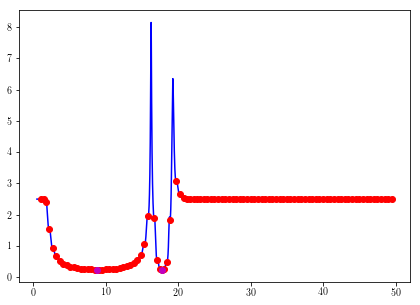

8.855 0.247000001849
17.77 0.247000129497
2


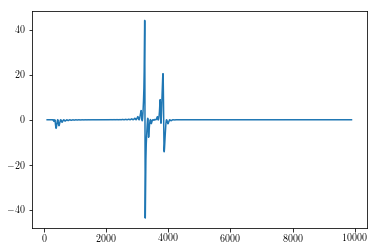

44.2354404091


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

from math import *

import matplotlib.animation as manimation



W=2*np.pi
dw=0.1235
T=(2*np.pi)/W
n=50
L=n*T

N_grid=10000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

p=int(round(T/h))

d=2.5
dd=-2.45

s=3000

k0=np.array([d]*N_grid)
k0[2*p:2*p+s]=d+dd

k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
f=lambda t, x: 2*dw-k0_f(t)*sin(x)

init=np.arcsin(2*dw/k0[0])
theta=[0]*N_grid
for i in range(N_grid):
    if i==0:
        theta[i]=init
    else:
        k1=f(t[i-1], theta[i-1])*h
        k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
        k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
        k4=f(t[i-1]+h, theta[i-1]+k3)*h
        
        theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6
        
theta=np.array(theta)

x0=np.sin(W*t)
y0=np.sin(W*t+theta)
C_0=[0]*N_grid
for i in range(N_grid):
    if (t[i]-T/2>=0) and (t[i]+T/2<=L):
        C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
    else:
        C_0[i]=nan       
phi0=np.arccos(C_0)
        
k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, k0, 'b')
plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.show()

from scipy.signal import argrelextrema
dmin=argrelextrema(k_hat, np.less)

eps=0.01

plt.figure(figsize=(7,5))
plt.plot(t, k_hat, 'b')
plt.plot(dmin[0]/p, k_hat[dmin[0]], 'ro')

n_min=dmin[0].shape[0]

for i in range(n_min):
    if ((((i==0) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i+1]]))
        or ((i==n_min-1) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i-1]]))
        or ((k_hat[dmin[0][i]]<k_hat[dmin[0][i-1]]) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i+1]])))
        and (dmin[0][i]>2*p) and (abs(k_hat[dmin[0][i]]-d)>eps)):
            #print(dmin[0][i]/p, k_hat[dmin[0][i]])
            plt.plot(dmin[0][i]/p, k_hat[dmin[0][i]], 'mo')



plt.show()

n_min=dmin[0].shape[0]

extr=[]

eps=0.001

for i in range(n_min):
    if ((((i==0) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i+1]]))
        or ((i==n_min-1) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i-1]]))
        or ((k_hat[dmin[0][i]]<k_hat[dmin[0][i-1]]) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i+1]])))
        and (dmin[0][i]>2*p) and (abs(k_hat[dmin[0][i]]-d)>eps)):
            extr.append(dmin[0][i])
            print(dmin[0][i]/p, k_hat[dmin[0][i]])

print(len(extr))
                
    
dk=np.diff(k_hat)/h
plt.figure()
plt.plot(dk)
plt.show()

dk=np.nan_to_num(dk)
        
print(max(dk))


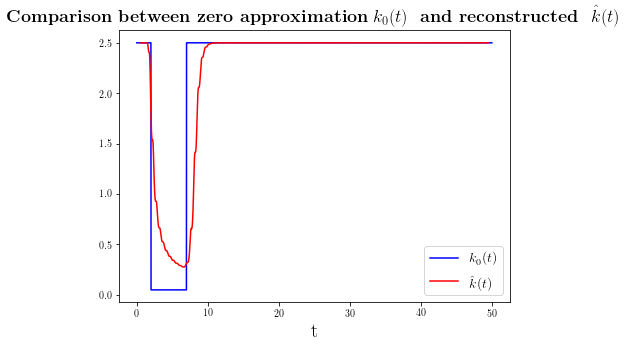

/usr/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:68: RuntimeWarning: invalid value encountered in less
  results &= comparator(main, plus)
/usr/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:69: RuntimeWarning: invalid value encountered in less
  results &= comparator(main, minus)


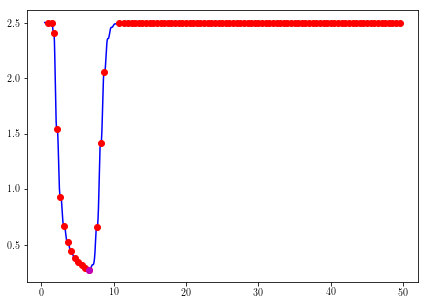

6.565 0.276838894194
1


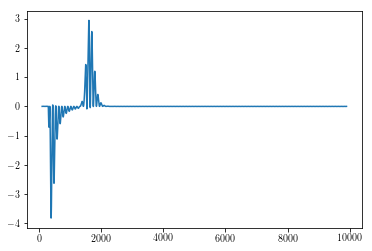

2.94460072566


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

from math import *

import matplotlib.animation as manimation


W=2*np.pi
dw=0.1235
T=(2*np.pi)/W
n=50
L=n*T

N_grid=10000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

p=int(round(T/h))

d=2.5
dd=-2.45

s=1000

k0=np.array([d]*N_grid)
k0[2*p:2*p+s]=d+dd

k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
f=lambda t, x: 2*dw-k0_f(t)*sin(x)

init=np.arcsin(2*dw/k0[0])
theta=[0]*N_grid
for i in range(N_grid):
    if i==0:
        theta[i]=init
    else:
        k1=f(t[i-1], theta[i-1])*h
        k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
        k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
        k4=f(t[i-1]+h, theta[i-1]+k3)*h
        
        theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6
        
theta=np.array(theta)

x0=np.sin(W*t)
y0=np.sin(W*t+theta)
C_0=[0]*N_grid
for i in range(N_grid):
    if (t[i]-T/2>=0) and (t[i]+T/2<=L):
        C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
    else:
        C_0[i]=nan       
phi0=np.arccos(C_0)
        
k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, k0, 'b')
plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.show()

from scipy.signal import argrelextrema
dmin=argrelextrema(k_hat, np.less)

eps=0.01

plt.figure(figsize=(7,5))
plt.plot(t, k_hat, 'b')
plt.plot(dmin[0]/p, k_hat[dmin[0]], 'ro')

n_min=dmin[0].shape[0]

for i in range(n_min):
    if ((((i==0) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i+1]]))
        or ((i==n_min-1) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i-1]]))
        or ((k_hat[dmin[0][i]]<k_hat[dmin[0][i-1]]) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i+1]])))
        and (dmin[0][i]>2*p) and (abs(k_hat[dmin[0][i]]-d)>eps)):
            #print(dmin[0][i]/p, k_hat[dmin[0][i]])
            plt.plot(dmin[0][i]/p, k_hat[dmin[0][i]], 'mo')



plt.show()

n_min=dmin[0].shape[0]

extr=[]

eps=0.001

for i in range(n_min):
    if ((((i==0) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i+1]]))
        or ((i==n_min-1) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i-1]]))
        or ((k_hat[dmin[0][i]]<k_hat[dmin[0][i-1]]) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i+1]])))
        and (dmin[0][i]>2*p) and (abs(k_hat[dmin[0][i]]-d)>eps)):
            extr.append(dmin[0][i])
            print(dmin[0][i]/p, k_hat[dmin[0][i]])

print(len(extr))
                
    
dk=np.diff(k_hat)/h
plt.figure()
plt.plot(dk)
plt.show()

dk=np.nan_to_num(dk)
        
print(max(dk))


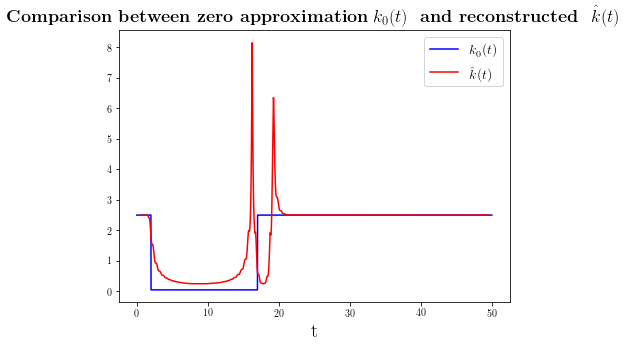

/usr/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:68: RuntimeWarning: invalid value encountered in less
  results &= comparator(main, plus)
/usr/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:69: RuntimeWarning: invalid value encountered in less
  results &= comparator(main, minus)


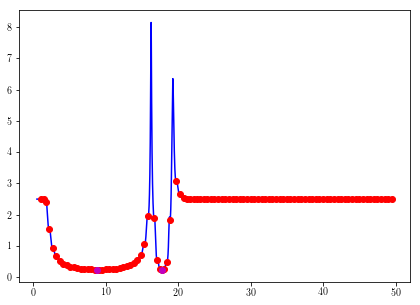

8.855 0.247000001849
17.77 0.247000129497
2


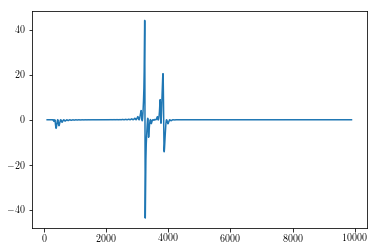

44.2354404091


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

from math import *

import matplotlib.animation as manimation

W=2*np.pi
dw=0.1235
T=(2*np.pi)/W
n=50
L=n*T

N_grid=10000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

p=int(round(T/h))

d=2.5
dd=-2.45

s=3000

k0=np.array([d]*N_grid)
k0[2*p:2*p+s]=d+dd

k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
f=lambda t, x: 2*dw-k0_f(t)*sin(x)

init=np.arcsin(2*dw/k0[0])
theta=[0]*N_grid
for i in range(N_grid):
    if i==0:
        theta[i]=init
    else:
        k1=f(t[i-1], theta[i-1])*h
        k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
        k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
        k4=f(t[i-1]+h, theta[i-1]+k3)*h
        
        theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6
        
theta=np.array(theta)

x0=np.sin(W*t)
y0=np.sin(W*t+theta)
C_0=[0]*N_grid
for i in range(N_grid):
    if (t[i]-T/2>=0) and (t[i]+T/2<=L):
        C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
    else:
        C_0[i]=nan       
phi0=np.arccos(C_0)
        
k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(7, 5))
plt.plot(t, k0, 'b')
plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.show()

from scipy.signal import argrelextrema
dmin=argrelextrema(k_hat, np.less)

eps=0.01

plt.figure(figsize=(7,5))
plt.plot(t, k_hat, 'b')
plt.plot(dmin[0]/p, k_hat[dmin[0]], 'ro')

n_min=dmin[0].shape[0]

for i in range(n_min):
    if ((((i==0) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i+1]]))
        or ((i==n_min-1) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i-1]]))
        or ((k_hat[dmin[0][i]]<k_hat[dmin[0][i-1]]) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i+1]])))
        and (dmin[0][i]>2*p) and (abs(k_hat[dmin[0][i]]-d)>eps)):
            #print(dmin[0][i]/p, k_hat[dmin[0][i]])
            plt.plot(dmin[0][i]/p, k_hat[dmin[0][i]], 'mo')



plt.show()

n_min=dmin[0].shape[0]

extr=[]

eps=0.001

for i in range(n_min):
    if ((((i==0) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i+1]]))
        or ((i==n_min-1) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i-1]]))
        or ((k_hat[dmin[0][i]]<k_hat[dmin[0][i-1]]) and (k_hat[dmin[0][i]]<k_hat[dmin[0][i+1]])))
        and (dmin[0][i]>2*p) and (abs(k_hat[dmin[0][i]]-d)>eps)):
            extr.append(dmin[0][i])
            print(dmin[0][i]/p, k_hat[dmin[0][i]])

print(len(extr))
                
    
dk=np.diff(k_hat)/h
plt.figure()
plt.plot(dk)
plt.show()

dk=np.nan_to_num(dk)
        
print(max(dk))
